In [41]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import scipy.optimize as spo
np.set_printoptions(suppress=True, linewidth= 500)
from IPython.display import display
from mpl_toolkits.axes_grid.inset_locator import inset_axes

In [42]:
V = np.array([0.398,0.381,0.362,0.341,0.314,0.284,0.249,0.211,0.161,0.1,0.037,0.006,-0.004,-0.004,-0.004])
R = np.array([35.581,35.353,35.136,34.923,34.704,34.496,34.283,34.09,33.883,33.687,33.486,33.295,33.108,32.916,32.734])

V1 = np.array([-0.004,-0.003,-0.002,-0.001,0,0.001,0.002,0.003,0.004,0.005,0.007,0.016,0.024,0.037,0.062,0.086,0.106,0.132,0.156,0.19,0.205,0.226,0.241,0.253,0.269,0.282,0.291,0.302])
R1 = np.array([33.22,33.391,33.459,33.493,33.56,33.56,33.594,33.594,33.611,33.628,33.645,33.728,33.778,33.845,33.944,34.025,34.091,34.172,34.253,34.382,34.466,34.541,34.62,34.683,34.776,34.854,34.916,34.993])

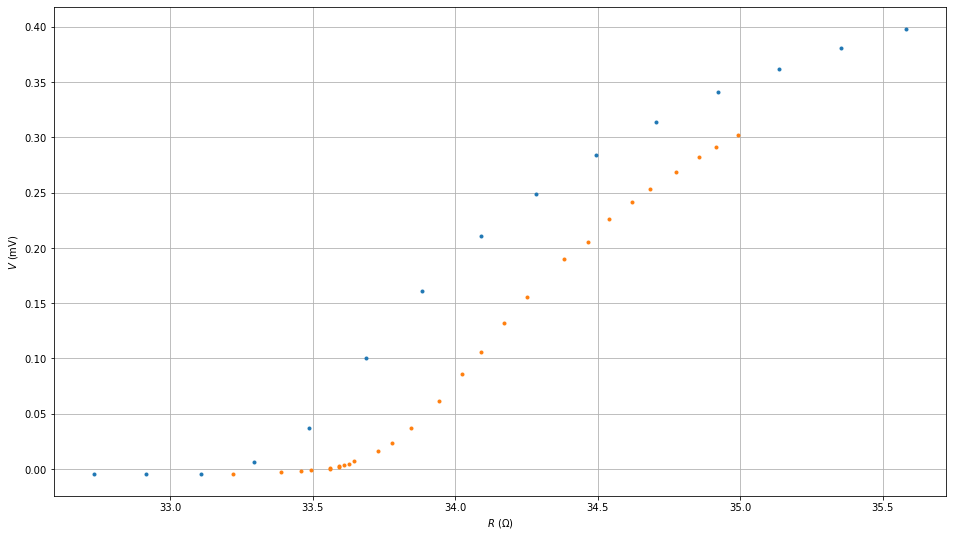

In [44]:
xlabel = r"$R$ ($\Omega$)"
ylabel = r"$V$ (mV)"

plt.figure(figsize=(16,9))
plt.plot(R,V, '.', label = 'Arrefecimento')
plt.grid()
plt.xlabel(xlabel)
plt.ylabel(ylabel)


xlabel = r"$R$ ($\Omega$)"
ylabel = r"$V$ (mV)"
plt.plot(R1,V1, '.', label = 'Aquecimento')
plt.grid()
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.grid()



In [18]:
def T(func, resistencia):
    """
    Função que devolve o valor da temperatura em função da resistência
    """
    x = np.copy(resistencia)
    Temp = np.zeros(len(resistencia))

    def diff(x,a):
        yt = func(x)
        return (yt - a )**2

    for idx,x_value in enumerate(x):
        res = spo.minimize(diff, 100.0, args=(x_value), method='Nelder-Mead', tol=1e-6)
        Temp[idx] = res.x[0]

    return Temp

def r(T):
    T9 = 0.1537897405e-16 * T**9
    T8 = -0.1461647089e-13 * T**8
    T7 = 0.5841971715e-11 * T**7
    T6 = -0.1284275396e-8 * T**6
    T5 = 0.1692827574e-6 * T**5
    T4 = -0.1344391685e-4 * T**4
    T3 = 0.5763600500e-3 * T**3
    T2 = -0.5808241918e-2 * T**2
    T1 = -0.9257095046e-1 * T**1
    T0 = 0.3287262171e1

    return T9 + T8 + T7 + T6 + T5 + T4 + T3 + T2 + T1 + T0

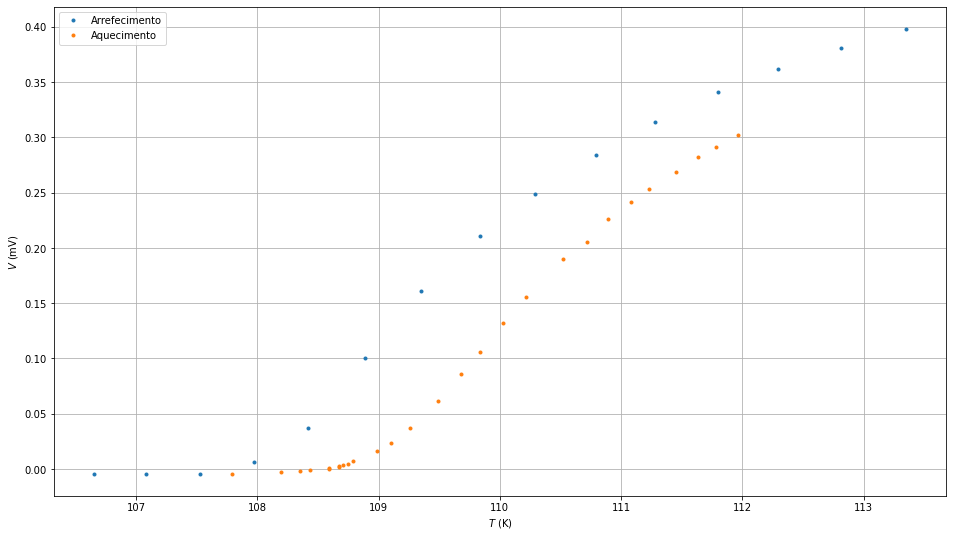

In [45]:
plt.figure(figsize=(16,9))
plt.plot(T(r,R),V, '.', label = 'Arrefecimento')
plt.grid()
plt.xlabel(xlabel)
plt.ylabel(ylabel)

plt.plot(T(r,R1),V1, '.', label = 'Aquecimento')
plt.grid()
xlabel = r"$T$ (K)"
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.legend()
plt.grid()

In [23]:
T(r,0.01*np.ones(3))

array([16.56835258, 16.56835258, 16.56835258])

In [25]:
x = T(r,R)
y = V

x1 = T(r,R1)
y1 = V1


I wrote a simple algorithm which breaks my array into smaller arrays of 3 points. Then fit a 2nd order function through those three points, take its derivative, and calculate the value at the middle point. For the end points, I only use two values.

It's a bit messy. And I know there are more efficient ways to do the loop. Here is what I did

In [30]:
dydx=[]
for i in range(len(x)):
    if i==0:
        dx=x[i:i+2]
        dy=y[i:i+2]
        order=1
    elif i==len(x)-1:
        dx=x[i-1:i+1]
        dy=y[i-1:i+1]
        order=1
    else:
        dx=x[i-1:i+2]
        dy=y[i-1:i+2]
        order=2
    z=np.polyfit(dx,dy,len(dx)-1)
    f=np.poly1d(z)
    df=np.polyder(f)
    dydx.append(float(df(x[i])))
dydx=np.array(dydx)

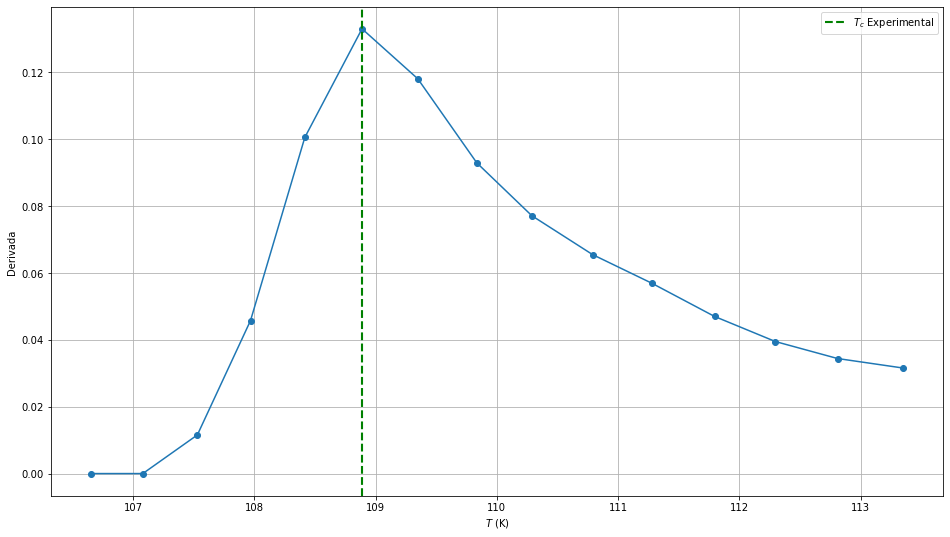

In [36]:
plt.figure(figsize=(16,9))
plt.plot(x,dydx,'-o')
plt.grid()
xlabel = r"$T$ (K)"
ylabel = r"Derivada"
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.axvline(x[np.argmax(dydx)], color="green", linestyle="dashed", linewidth=2.1,label=r"$T_c$ Experimental")
plt.legend()

In [32]:
np.max(dydx)

0.1330420767670207

In [44]:
np.argmax(dydx)

9

In [45]:
x[np.argmax(dydx)]

108.88780474662781

In [46]:
V = np.array([-0.004,-0.003,-0.002,-0.001,0,0.001,0.002,0.003,0.004,0.005,0.007,0.016,0.024,0.037,0.062,0.086,0.106,0.132,0.156,0.19,0.205,0.226,0.241,0.253,0.269,0.282,0.291,0.302])
R = np.array([33.22,33.391,33.459,33.493,33.56,33.56,33.594,33.594,33.611,33.628,33.645,33.728,33.778,33.845,33.944,34.025,34.091,34.172,34.253,34.382,34.466,34.541,34.62,34.683,34.776,34.854,34.916,34.993])

Text(0, 0.5, '$V$ (mV)')

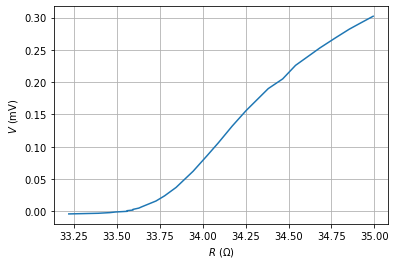

In [47]:
xlabel = r"$R$ ($\Omega$)"
ylabel = r"$V$ (mV)"
plt.plot(R,V)
plt.grid()
plt.xlabel(xlabel)
plt.ylabel(ylabel)

In [48]:
def T(func, resistencia):
    """
    Função que devolve o valor da temperatura em função da resistência
    """
    x = np.copy(resistencia)
    Temp = np.zeros(len(resistencia))

    def diff(x,a):
        yt = func(x)
        return (yt - a )**2

    for idx,x_value in enumerate(x):
        res = spo.minimize(diff, 100.0, args=(x_value), method='Nelder-Mead', tol=1e-6)
        Temp[idx] = res.x[0]

    return Temp

def r(T):
    T9 = 0.1537897405e-16 * T**9
    T8 = -0.1461647089e-13 * T**8
    T7 = 0.5841971715e-11 * T**7
    T6 = -0.1284275396e-8 * T**6
    T5 = 0.1692827574e-6 * T**5
    T4 = -0.1344391685e-4 * T**4
    T3 = 0.5763600500e-3 * T**3
    T2 = -0.5808241918e-2 * T**2
    T1 = -0.9257095046e-1 * T**1
    T0 = 0.3287262171e1

    return T9 + T8 + T7 + T6 + T5 + T4 + T3 + T2 + T1 + T0

Text(0, 0.5, '$V$ (mV)')

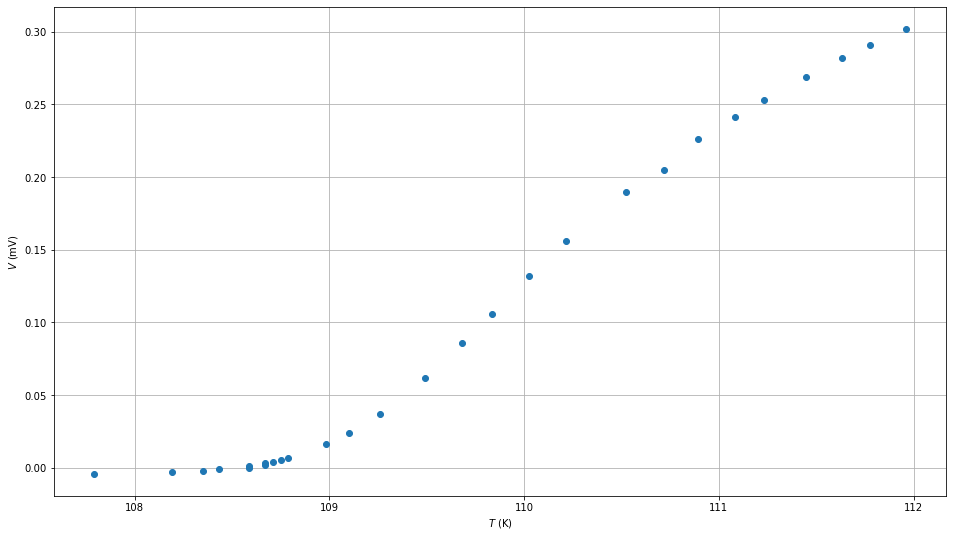

In [49]:
plt.figure(figsize=(16,9))
plt.plot(T(r,R),V, 'o')
plt.grid()
xlabel = r"$T$ (K)"
plt.xlabel(xlabel)
plt.ylabel(ylabel)

In [50]:
T(r,0.01*np.ones(3))

array([16.56835258, 16.56835258, 16.56835258])

In [51]:
x = T(r,R)
y = V

In [52]:
dydx=[]
for i in range(len(x)):
    if i==0:
        dx=x[i:i+2]
        dy=y[i:i+2]
        order=1
    elif i==len(x)-1:
        dx=x[i-1:i+1]
        dy=y[i-1:i+1]
        order=1
    else:
        dx=x[i-1:i+2]
        dy=y[i-1:i+2]
        order=2
    z=np.polyfit(dx,dy,len(dx)-1)
    f=np.poly1d(z)
    df=np.polyder(f)
    dydx.append(float(df(x[i])))
dydx=np.array(dydx)

/Users/inespascoal/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3418: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/inespascoal/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3418: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/inespascoal/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3418: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/inespascoal/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3418: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


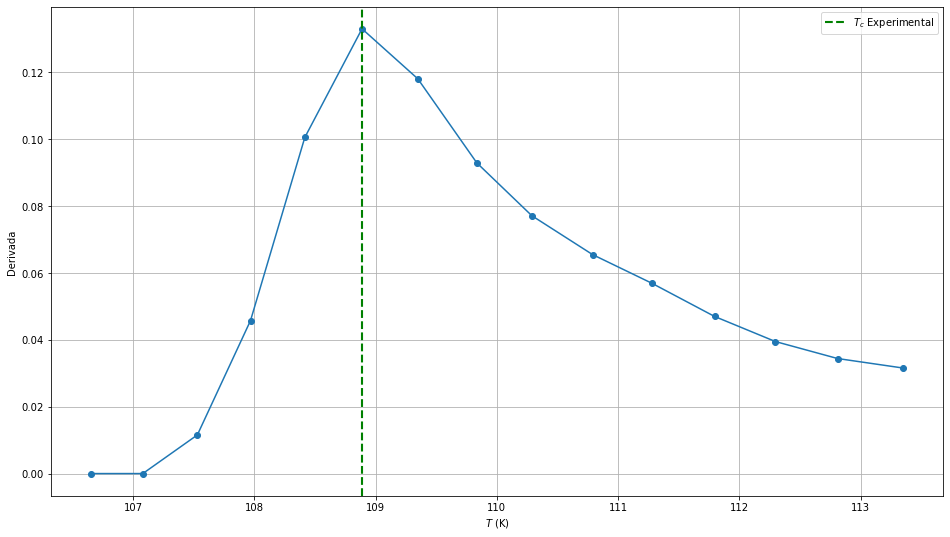

In [37]:
plt.figure(figsize=(16,9))
plt.plot(x,dydx,'-o')
plt.grid()
xlabel = r"$T$ (K)"
ylabel = r"Derivada"
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.axvline(x[np.argmax(dydx)], color="green", linestyle="dashed", linewidth=2.1,label=r"$T_c$ Experimental")
plt.legend()

In [54]:
np.max(dydx)

0.1323493397465345

In [55]:
np.argmax(dydx)

16

In [56]:
x[np.argmax(dydx)]

109.83680307865143

In [40]:
Tref = 108

print (-(108-108.887)/108*100)
print (-(108-109.836)/108*100)

0.8212962962962967
1.6999999999999988
